In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("^NSEBANK.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,29521.599609,29812.000000,29361.650391,29596.099609,29595.755859,0.0
1,2019-03-19,29702.599609,29799.750000,29547.699219,29767.849609,29767.503906,0.0
2,2019-03-20,29769.650391,29885.199219,29633.500000,29832.199219,29831.851563,0.0
3,2019-03-22,29920.750000,30008.099609,29508.699219,29582.500000,29582.156250,0.0
4,2019-03-25,29329.400391,29329.400391,29156.250000,29281.199219,29280.859375,0.0
...,...,...,...,...,...,...,...
1230,2024-03-11,47792.199219,47853.800781,47230.648438,47327.851563,47327.851563,204200.0
1231,2024-03-12,47351.351563,47812.750000,46884.449219,47282.398438,47282.398438,207200.0
1232,2024-03-13,47341.148438,47468.699219,46842.148438,46981.300781,46981.300781,274600.0
1233,2024-03-14,46825.750000,47231.500000,46565.550781,46789.949219,46789.949219,220400.0


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,29521.599609,29812.000000,29361.650391,29596.099609,29595.755859,0.0
1,2019-03-19,29702.599609,29799.750000,29547.699219,29767.849609,29767.503906,0.0
2,2019-03-20,29769.650391,29885.199219,29633.500000,29832.199219,29831.851563,0.0
3,2019-03-22,29920.750000,30008.099609,29508.699219,29582.500000,29582.156250,0.0
4,2019-03-25,29329.400391,29329.400391,29156.250000,29281.199219,29280.859375,0.0


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2024-03-11,47792.199219,47853.800781,47230.648438,47327.851563,47327.851563,204200.0
1231,2024-03-12,47351.351563,47812.750000,46884.449219,47282.398438,47282.398438,207200.0
1232,2024-03-13,47341.148438,47468.699219,46842.148438,46981.300781,46981.300781,274600.0
1233,2024-03-14,46825.750000,47231.500000,46565.550781,46789.949219,46789.949219,220400.0
1234,2024-03-15,46572.101563,46802.550781,46310.500000,46594.101563,46594.101563,339300.0


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1228 non-null   float64       
 2   High       1228 non-null   float64       
 3   Low        1228 non-null   float64       
 4   Close      1228 non-null   float64       
 5   Adj Close  1228 non-null   float64       
 6   Volume     1228 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.7 KB


In [7]:
data.nunique()

Date         1235
Open         1227
High         1227
Low          1227
Close        1227
Adj Close    1227
Volume        729
dtype: int64

In [8]:
data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [9]:
data[data.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
146,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN
191,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
410,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN
442,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
933,2022-12-26,NaN,NaN,NaN,NaN,NaN,NaN
1183,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1216,2024-02-19,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1228,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1.228000e+03
mean,2021-09-17 02:11:20.130293248,34966.078130,35228.330365,34646.388996,34940.104607,34939.821590,1.831039e+06
min,2019-03-18 00:00:00,16759.949219,17681.699219,16116.250000,16917.650391,16917.453125,0.000000e+00
25%,2020-06-24 18:00:00,30399.987305,30610.524414,30139.586914,30346.524902,30346.171386,0.000000e+00
50%,2021-09-18 12:00:00,35366.599610,35590.625000,35027.099610,35283.699219,35283.289062,1.618500e+05
75%,2022-12-13 06:00:00,41244.025390,41504.224610,40884.311524,41241.563476,41241.203125,2.459000e+05
max,2024-03-15 00:00:00,48479.050781,48636.449219,48343.148438,48508.550781,48508.550781,1.798102e+09
std,NaN,7503.374637,7477.786614,7538.389833,7511.168008,7511.232474,5.176718e+07


In [13]:
data.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.849089,0.851365,0.847446,0.849559,0.849564,0.020168
Open,0.849089,1.000000,0.999351,0.999316,0.998594,0.998594,0.028782
High,0.851365,0.999351,1.000000,0.999078,0.999392,0.999392,0.029143
Low,0.847446,0.999316,0.999078,1.000000,0.999358,0.999358,0.029682
Close,0.849559,0.998594,0.999392,0.999358,1.000000,1.000000,0.029480
Adj Close,0.849564,0.998594,0.999392,0.999358,1.000000,1.000000,0.029481
Volume,0.020168,0.028782,0.029143,0.029682,0.029480,0.029481,1.000000


# EDA (Exploratiory Data Analysis)

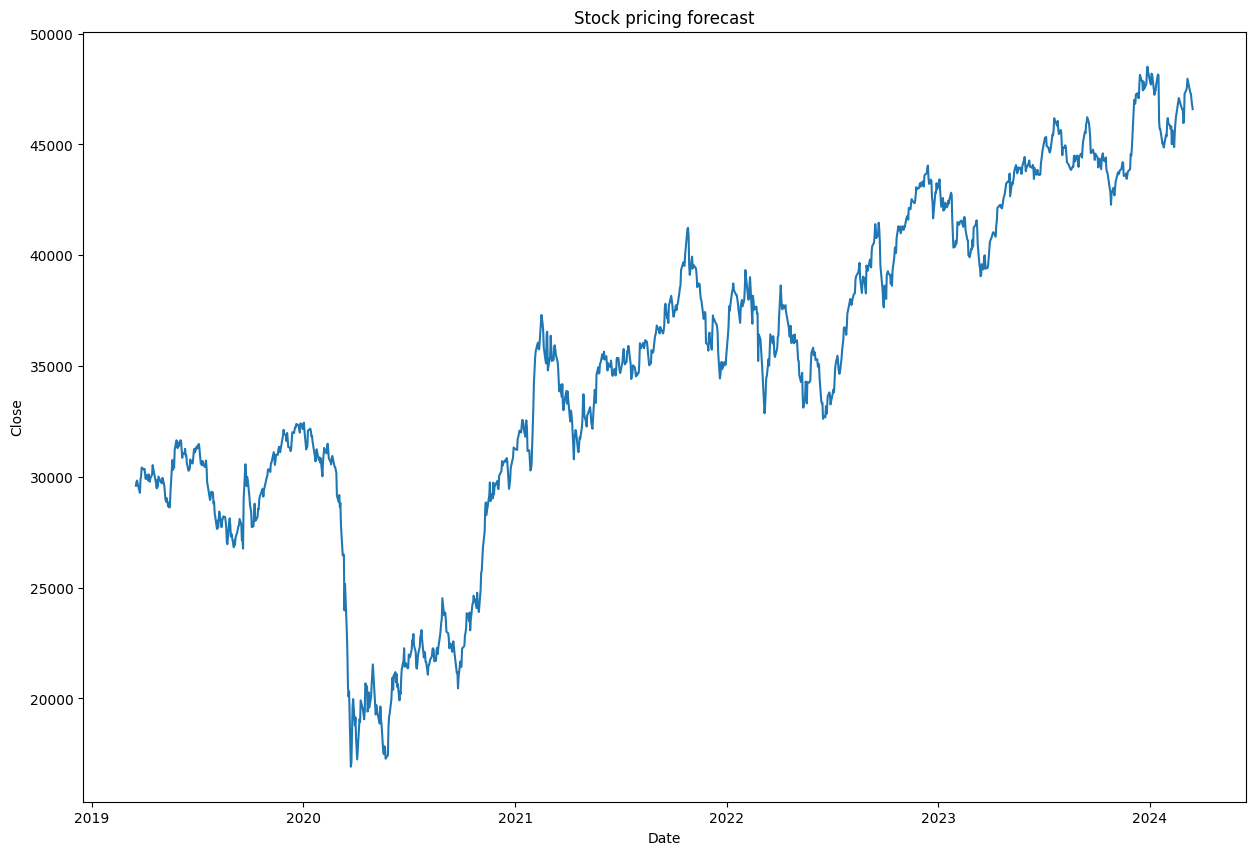

In [14]:
# now we move to visualization : 

plt.figure(figsize=(15,10))
x = (data['Date'])
y = (data['Close'])
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock pricing forecast')
plt.show()

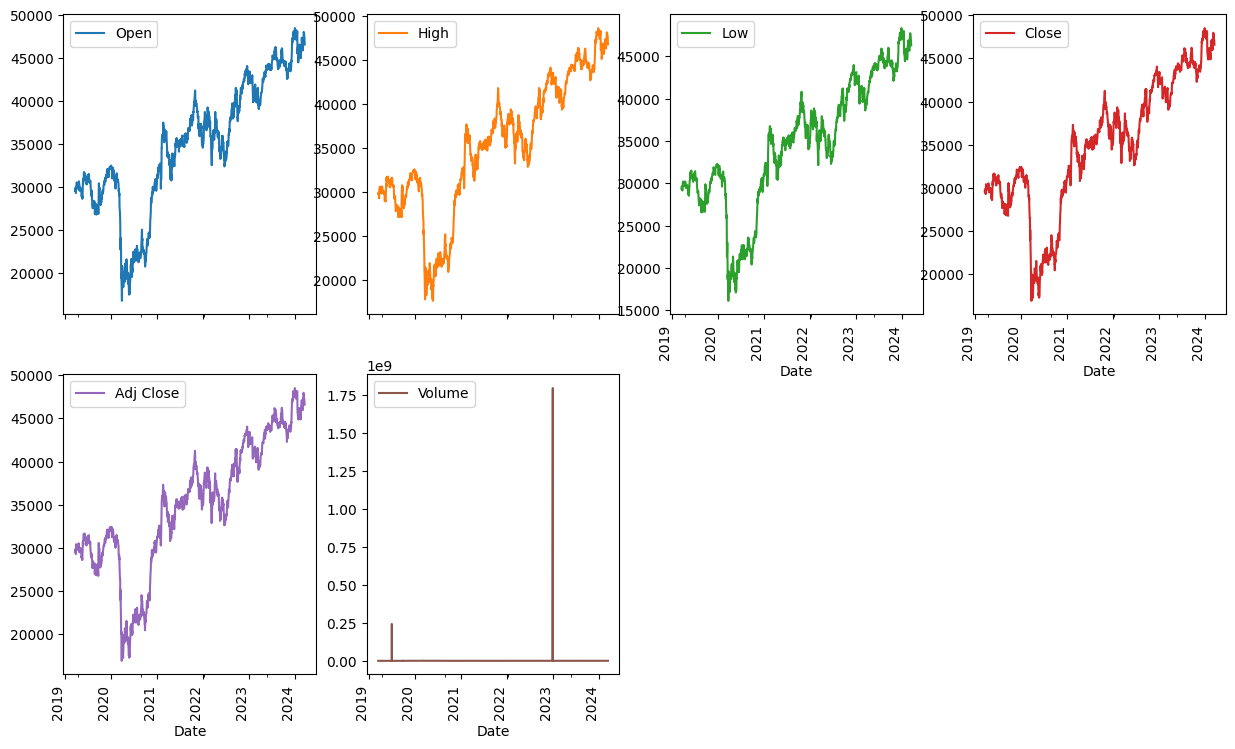

In [15]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

data.plot(x = "Date", y = columns, subplots = True, figsize= (15,15), layout=(3,4),rot=90)
plt.show()

# Nifty's Biggest downfall started on 27/02/2020 because of covid and it hits lowest price on 24/03/2020 at Rs. 16,116/-

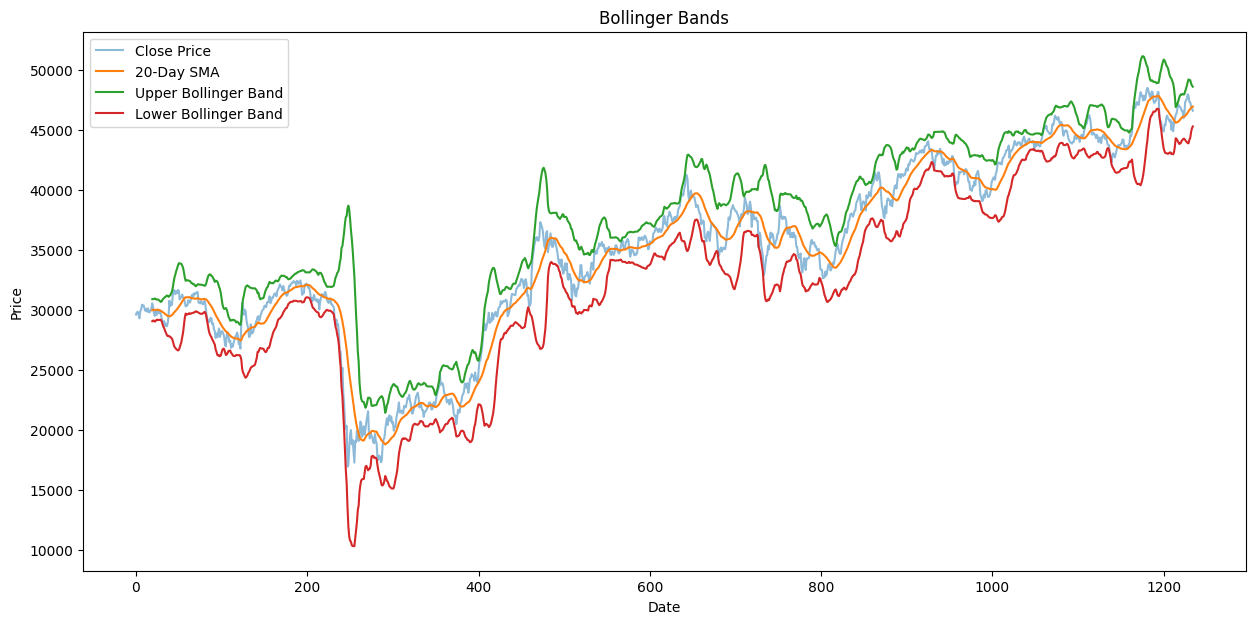

In [16]:
# Calculate and plot Bollinger Bands

fig = plt.subplots(figsize=(15,7))
data['20SMA'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['20SMA'] + 3 * data['Close'].rolling(window=20).std()
data['Lower'] = data['20SMA'] - 3 * data['Close'].rolling(window=20).std()
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
plt.plot(data.index, data['20SMA'], label='20-Day SMA')
plt.plot(data.index, data['Upper'], label='Upper Bollinger Band')
plt.plot(data.index, data['Lower'], label='Lower Bollinger Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

1) In 2020 NIFTY hit it's lowest point due to covid but recovered after        24/3/2020

2) In and after 2021 Nifty performed well.

3) Most volume of shares were traded in year 2020.

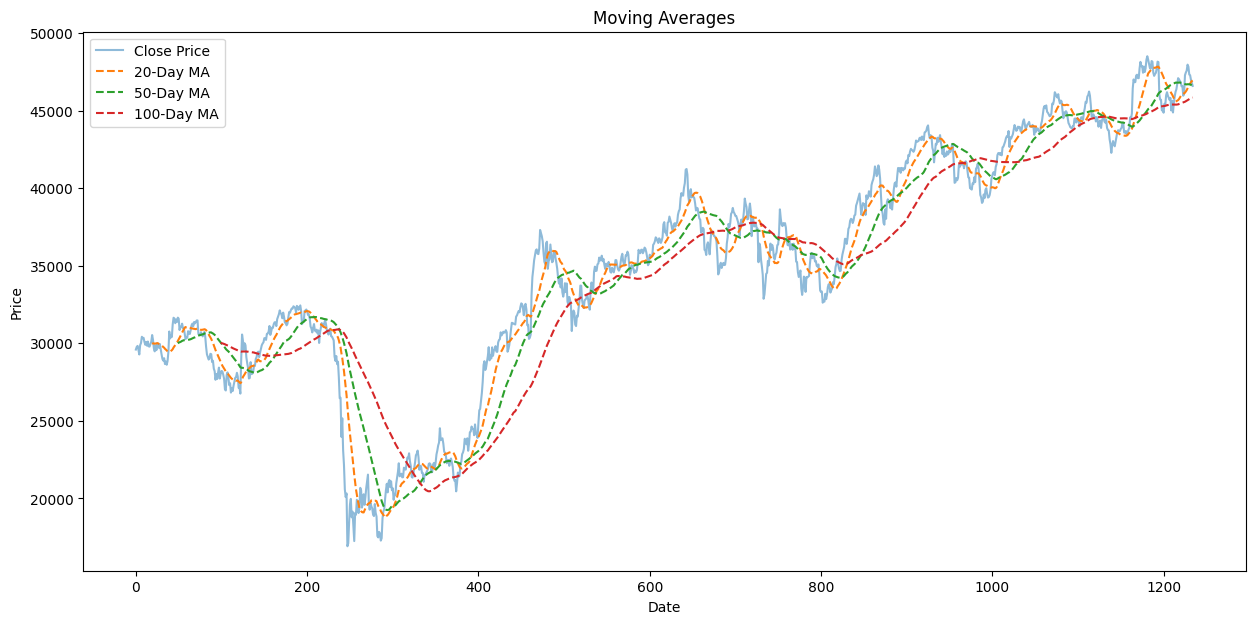

In [17]:
# Simple moving average
fig = plt.subplots(figsize=(15,7))
data['20MA'] = data['Close'].rolling(window=20).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['100MA'] = data['Close'].rolling(window=100).mean()
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
plt.plot(data.index, data['20MA'], label='20-Day MA', linestyle='--')
plt.plot(data.index, data['50MA'], label='50-Day MA', linestyle='--')
plt.plot(data.index, data['100MA'], label='100-Day MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()

In [46]:
#!pip install statsmodels

In [19]:
# check whether data is stationary or non-stationary
# import statsmodel liabary to get adf test for checking stationary data.
from statsmodels.tsa.stattools import adfuller

In [20]:
# 2nd technique to ckeck data
# again i check data stationary or not

def adf_test(data):
    result = adfuller(data)
    print('ADF statistics : {}'.format(result[0]))
    print('p-value :{}'.format(result[1]))
    if result[1] <= 0.05:
        print('Data is stationary')
    else:
        print('Data is Non-stationary')

In [21]:
adf_test(data['Close'])

ADF statistics : -0.7873332780404727
p-value :0.8228145349204844
Data is Non-stationary


In [22]:
S_prices = data['Close']

stationary_data = S_prices.diff().dropna()

print(stationary_data.head())

1    171.750000
2     64.349610
3   -249.699219
4   -301.300781
5    600.951172
Name: Close, dtype: float64


In [23]:
data['Close first difference'] = data['Close'] - data['Close'].shift(1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20SMA,Upper,Lower,20MA,50MA,100MA,Close first difference
0,2019-03-18,29521.599609,29812.000000,29361.650391,29596.099609,29595.755859,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-19,29702.599609,29799.750000,29547.699219,29767.849609,29767.503906,0.0,NaN,NaN,NaN,NaN,NaN,NaN,171.750000
2,2019-03-20,29769.650391,29885.199219,29633.500000,29832.199219,29831.851563,0.0,NaN,NaN,NaN,NaN,NaN,NaN,64.349610
3,2019-03-22,29920.750000,30008.099609,29508.699219,29582.500000,29582.156250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-249.699219
4,2019-03-25,29329.400391,29329.400391,29156.250000,29281.199219,29280.859375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-301.300781


In [24]:
adf_test(data['Close first difference'].dropna())

ADF statistics : -14.04489972158181
p-value :3.2539083362631547e-26
Data is stationary


<Axes: >

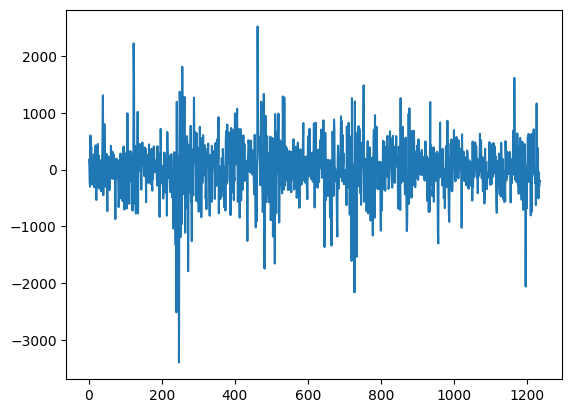

In [25]:
data['Close first difference'].plot()

In [26]:
data['Seasonal First Difference'] = data['Close'] - data['Close'].shift(12)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20SMA,Upper,Lower,20MA,50MA,100MA,Close first difference,Seasonal First Difference
0,2019-03-18,29521.599609,29812.000000,29361.650391,29596.099609,29595.755859,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-19,29702.599609,29799.750000,29547.699219,29767.849609,29767.503906,0.0,NaN,NaN,NaN,NaN,NaN,NaN,171.750000,NaN
2,2019-03-20,29769.650391,29885.199219,29633.500000,29832.199219,29831.851563,0.0,NaN,NaN,NaN,NaN,NaN,NaN,64.349610,NaN
3,2019-03-22,29920.750000,30008.099609,29508.699219,29582.500000,29582.156250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-249.699219,NaN
4,2019-03-25,29329.400391,29329.400391,29156.250000,29281.199219,29280.859375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-301.300781,NaN


In [27]:
adf_test(data['Seasonal First Difference'].dropna())

ADF statistics : -7.393130268256691
p-value :7.904419890888017e-11
Data is stationary


<Axes: >

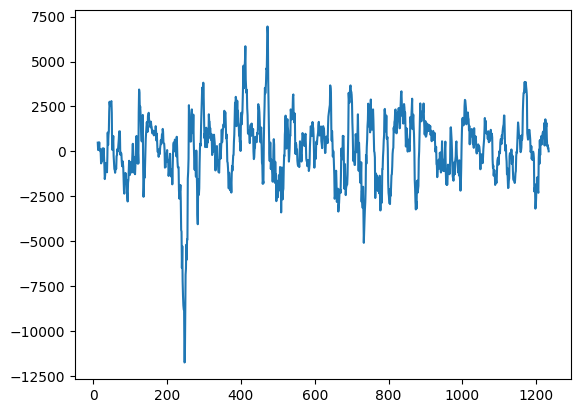

In [28]:
data['Seasonal First Difference'].plot()

In [29]:
data['Seasonal Second Difference']= data['Close'] - data['Close'].shift(31)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20SMA,Upper,Lower,20MA,50MA,100MA,Close first difference,Seasonal First Difference,Seasonal Second Difference
0,2019-03-18,29521.599609,29812.000000,29361.650391,29596.099609,29595.755859,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-19,29702.599609,29799.750000,29547.699219,29767.849609,29767.503906,0.0,NaN,NaN,NaN,NaN,NaN,NaN,171.750000,NaN,NaN
2,2019-03-20,29769.650391,29885.199219,29633.500000,29832.199219,29831.851563,0.0,NaN,NaN,NaN,NaN,NaN,NaN,64.349610,NaN,NaN
3,2019-03-22,29920.750000,30008.099609,29508.699219,29582.500000,29582.156250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-249.699219,NaN,NaN
4,2019-03-25,29329.400391,29329.400391,29156.250000,29281.199219,29280.859375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-301.300781,NaN,NaN


In [30]:
adf_test(data['Seasonal Second Difference'].dropna())

ADF statistics : -5.67802812151509
p-value :8.614240300842468e-07
Data is stationary


<Axes: >

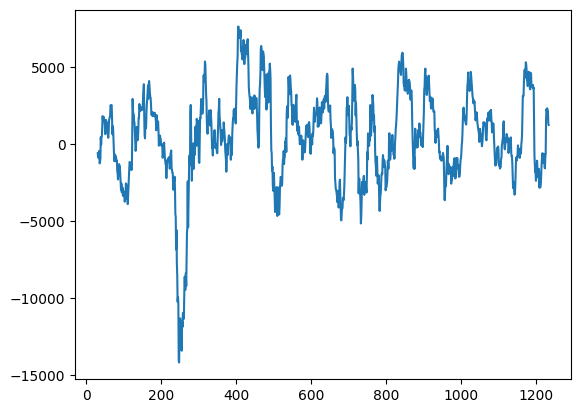

In [31]:
data['Seasonal Second Difference'].plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

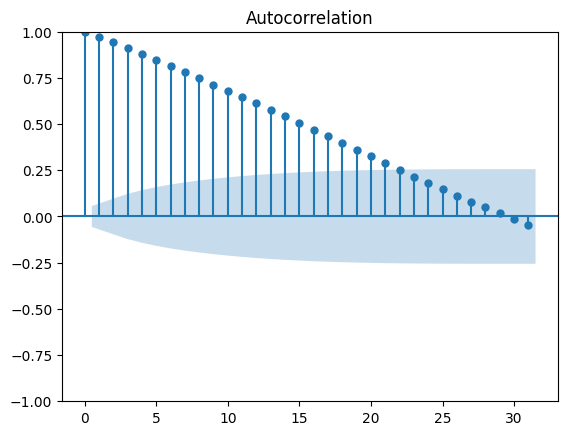

In [33]:
acf = plot_acf(data['Seasonal Second Difference'].dropna())

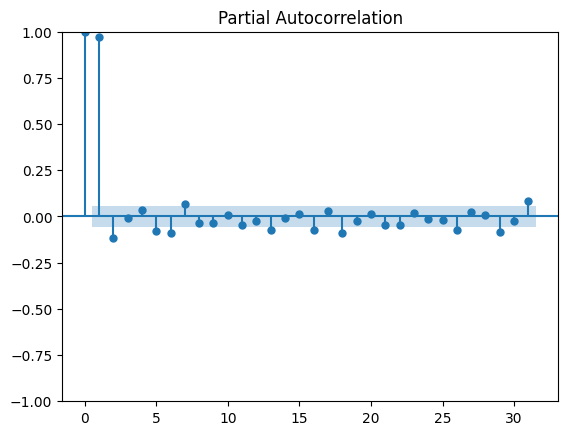

In [34]:
pacf = plot_pacf(data['Seasonal Second Difference'].dropna())

In [35]:
# Splitting the data for Train-Test-Split.

df = pd.read_csv('^NSEBANK.csv')

#Ensure that the data is sorted by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Calculate the split point
total_data_points = len(df)
split_percentage = 0.7
split_point = int(total_data_points * split_percentage)

#Split the data into training and testing sets
training_data = df[:split_point]
testing_data = df[split_point:]

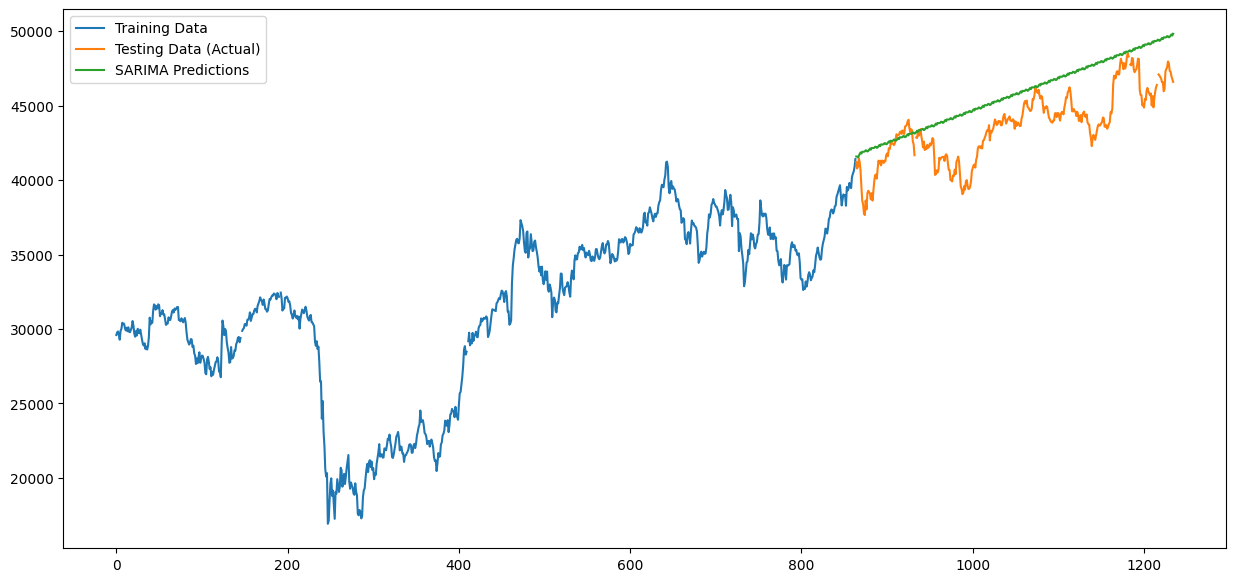

In [36]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

ts_column = 'Close'
training_data_series = training_data[ts_column]
testing_data_series = testing_data[ts_column]

order = (5, 1, 0)
seasonal_order = (0, 1, 1, 11)
model = SARIMAX(training_data_series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(testing_data_series))

plt.figure(figsize=(15, 7))
plt.plot(training_data_series, label='Training Data')
plt.plot(testing_data_series.index, testing_data_series, label='Testing Data (Actual)')
plt.plot(testing_data_series.index, predictions, label='SARIMA Predictions')
plt.legend()
plt.show()

In [38]:
testing_data_series.shape

(371,)

In [39]:
predictions.shape

(371,)

In [40]:
df['Close'].isnull().sum()

7

In [41]:
df['Close'].fillna(df['Close'].mean(),inplace= True)

In [42]:
df['Close'].isnull().sum()

0

In [43]:
# checking all errors:-
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(testing_data_series, predictions)
mse = mean_squared_error(testing_data_series, predictions)
#rmse = root_mean_squared_error(testing_data_series, predictions)

print("Mean Absolute Error :", mae)
print("Mean Squared Error : ", mse)
#print("Root Mean Squared Error: ", rmse)


Mean Absolute Error : 2285.1270539387856
Mean Squared Error :  7906862.829004639


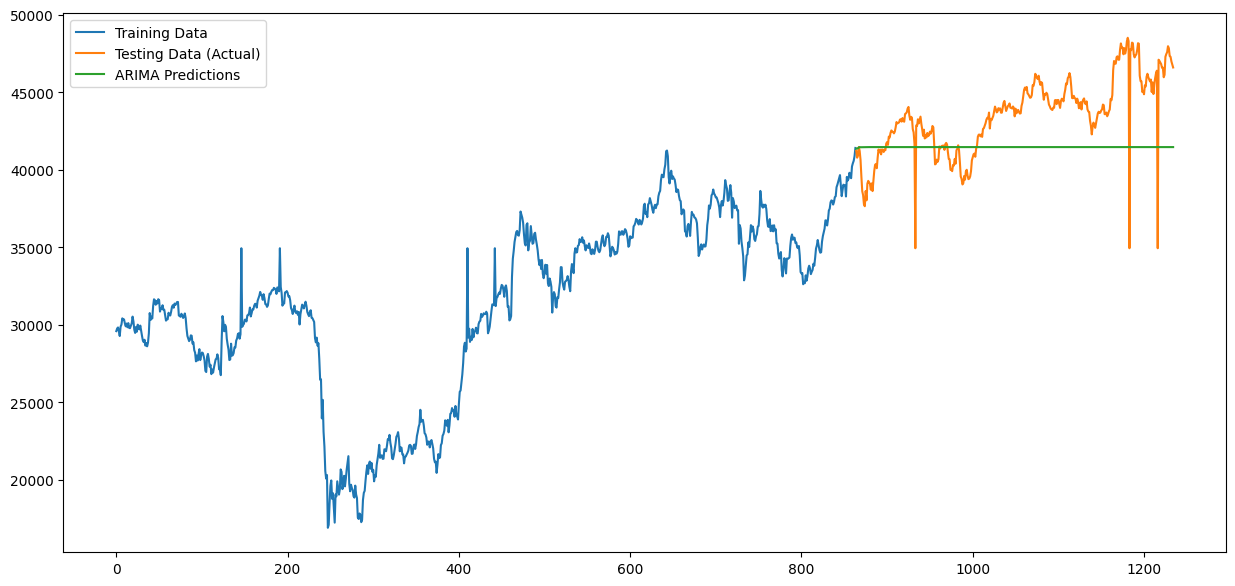

In [44]:
# Apply ARIMA Model
# first import ARIMA
# For non-seasonal data
from statsmodels.tsa.arima.model import ARIMA

ts_column = 'Close'
training_data_series = training_data[ts_column]
testing_data_series = testing_data[ts_column]

order = (5, 1, 0)
model = ARIMA(training_data_series, order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps= len(testing_data_series))

plt.figure(figsize=(15,7))
plt.plot(training_data_series, label ='Training Data')
plt.plot(testing_data_series.index, testing_data_series, label = 'Testing Data (Actual)')
plt.plot(testing_data_series.index, predictions, label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(testing_data_series, predictions)
mse = mean_squared_error(testing_data_series, predictions)
#rmse = root_mean_squared_error(testing_data_series, predictions)

print("Mean Absolute Error :", mae)
print("Mean Squared Error : ", mse)
#print("Root Mean Squared Error: ", rmse)

Mean Absolute Error : 2663.9317889334475
Mean Squared Error :  10213490.878599685
